# 1/2/2019
### Classifying artwork according to genre using a convolutional neural net.
Requirements: all image data stored in a folder, dataframe with image filenames and categories


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import PIL

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

Using TensorFlow backend.


In [2]:
dataframe = pd.read_csv('files-and-labels.csv').astype('str')
weights = 1./dataframe['genre'].value_counts()

Data pipeline: iterator that imports and augments data in real time

In [3]:
nn = 150
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
train_generator = datagen.flow_from_dataframe(dataframe=dataframe,directory='art-train-full', 
                                              x_col='filename',y_col='genre',
                                              class_mode='categorical',target_size=(nn,nn),
                                              color_mode='rgb', batch_size=32)

Found 11025 images belonging to 42 classes.


In [4]:
x,y = train_generator.next()

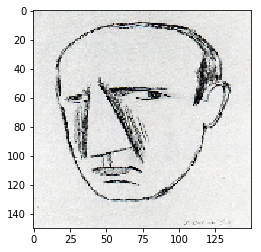

In [5]:
image = x[20]
plt.imshow(image)
plt.show()

Build model: create neural network by adding layers in sequence

In [6]:
model = keras.Sequential()
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=(nn,nn,3)))
model.add(Activation('relu'))
#model.add(Conv2D(32, (5, 5)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
#model.add(Dropout(0.01))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
#model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.05))
model.add(Dense(42, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit_generator(
        train_generator,class_weight=weights,
        steps_per_epoch=300,verbose=1,
        epochs=1)